In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import dowhy
from dowhy import CausalModel
import dowhy.datasets

print("All packages imported successfully!")

All packages imported successfully!


In [38]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
N = 1000

# Generate synthetic features
income = np.random.normal(50000, 5000, N)  # Annual income

# Define a function to determine plus member status based on income
def determine_plus_member(income):
    probability = 1 / (1 + np.exp(-(income - 50000) / 5000))  # Logistic function for probability
    return np.random.binomial(1, probability)

# Generate binary feature for plus_member
plus_member = np.array([determine_plus_member(inc) for inc in income])

# Generate customer lifetime value (CLV) with some noise
clv = 0.05 * income + 500 * plus_member + np.random.normal(0, 3000, N)

# Create a DataFrame
data = pd.DataFrame({
    'income': income,
    'plus_member': plus_member,
    'clv': clv
})

# Display the first few rows of the DataFrame
print(data.head())


         income  plus_member          clv
0  52483.570765            1  2196.551307
1  49308.678494            0   208.964708
2  53238.442691            1  4119.445666
3  57615.149282            1  7402.108802
4  48829.233126            0 -3184.055753


## Show the (synthethic) relationship between income and `plus_member = True` likelihood.

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
N = 1000

# Generate synthetic features
income = np.random.normal(50000, 3000, N)  # Annual income

# Define a function to determine plus member status based on income
def determine_plus_member(income):
    probability = 1 / (1 + np.exp(-(income - 50000) / 5000))  # Logistic function for probability
    return np.random.binomial(1, probability)

# Generate binary feature for plus_member
plus_member = np.array([determine_plus_member(inc) for inc in income])

# Generate customer lifetime value (CLV) with some noise
clv = 0.08 * income + 500 * plus_member + np.random.normal(0, 2000, N)

# Create a DataFrame
data = pd.DataFrame({
    'income': income,
    'plus_member': plus_member,
    'clv': clv
})

data.head()

,income,plus_member,clv
0,51490.142459,1,4000.793243
1,49585.207096,0,2462.503757
2,51943.065614,0,4793.794270
3,54569.089569,1,7546.428058
4,49297.539876,0,193.458251


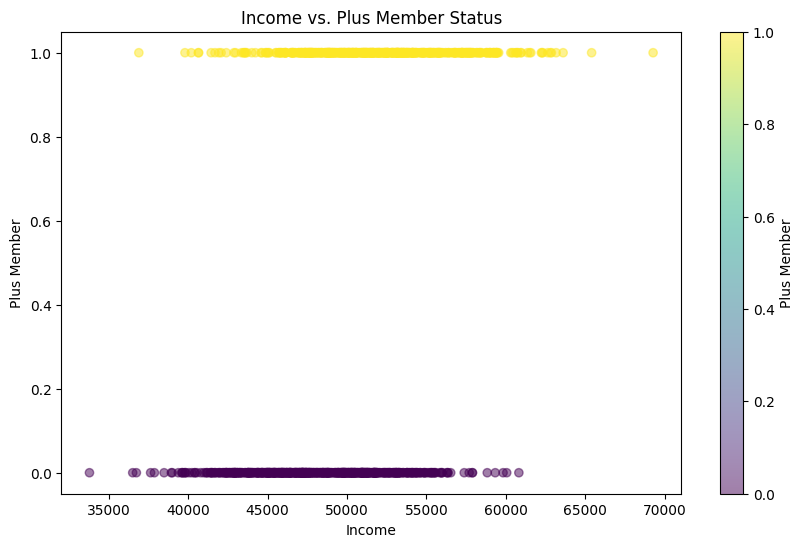

In [41]:
# Plot income vs. plus_member
plt.figure(figsize=(10, 6))
plt.scatter(data['income'], data['plus_member'], alpha=0.5, c=data['plus_member'], cmap='viridis')
plt.xlabel('Income')
plt.ylabel('Plus Member')
plt.title('Income vs. Plus Member Status')
plt.colorbar(label='Plus Member')
plt.show()


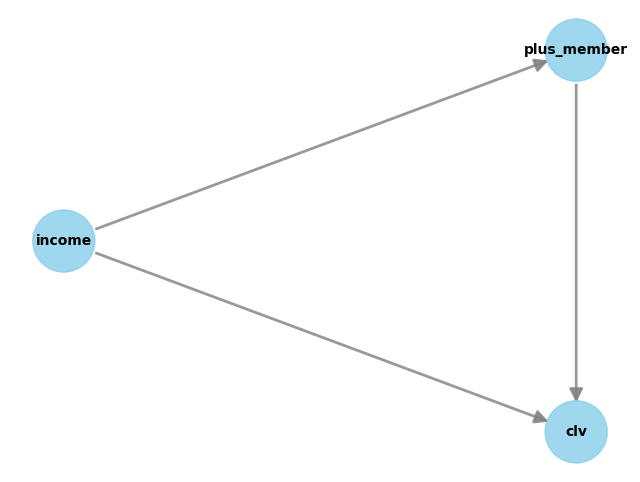

In [54]:
# Correct the graph format for the causal model
graph = """
digraph {
    income -> plus_member;
    income -> clv;
    plus_member -> clv;
}
"""

# Create a causal model using a Directed Acyclic Graph (DAG)
model = CausalModel(
    data=data,
    treatment='plus_member',
    outcome='clv',
    graph=graph
)

# Visualize the causal DAG
model.view_model()
plt.show()

In [55]:
# Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

# Estimate the causal effect using linear regression
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")
print(estimate)

# Display the effect estimate
print("Causal Estimate is ", estimate.value)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                      
──────────────(E[clv|income])
d[plus_member]               
Estimand assumption 1, Unconfoundedness: If U→{plus_member} and U→clv then P(clv|plus_member,income,U) = P(clv|plus_member,income)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                      
──────────────(E[clv|income])
d[plus_member]               
Estimand assumption 1, Unconfoundedness: If U→{plus_member} and U→clv then P(clv|plus_member,income,U) = P(clv|plus_member,income)

## Realized estimand
b: clv~plus_member+income
Target units: ate

## Estimate
Mean value: 523.0045193280566

Causal Estimate is  523.0045193280566


/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [56]:
# Refute the estimate using a placebo test
refute_placebo = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refute_placebo)

/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarni

Refute: Use a Placebo Treatment
Estimated effect:523.0045193280566
New effect:-13.214642792719483
p value:0.88



/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarni

In [13]:
# Refute the estimate using a data subset refuter
refute_subset = model.refute_estimate(identified_estimand, estimate, method_name="data_subset_refuter")
print(refute_subset)

/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarni

Refute: Use a subset of data
Estimated effect:874.7774975956163
New effect:885.7635423189437
p value:0.98



/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/Users/ekinderdiyok/Documents/projects/causal-inference/.conda/lib/python3.11/site-packages/dowhy/causal_estimators/regression_estimator.py:179: FutureWarni